# Atividade - Análise Exploratória de Dados

Para esta atividade vamos utilizar o dataset "milsa" do livro Estatística Básica de W. Bussab e P. Morettin.

Ele contém um conjunto de dados hipotético de atributos (variáveis) de 36 funcionários da companhia nomeada pelo autor por "Milsa".

Objetivos:
1- Entrada de dados
2- Preparar dados
3- Fazer análise exploratória

## Leitura dos dados Milsa via drive

Análise Exploratória de Dados - 36 funcionários cadastrados na seção de orçamentos da companhia Milsa.

In [2]:
###ler os dados que estao salvos no drive
import pandas as pd
# from google.colab import drive
# drive.mount('/content/drive')

import csv

milsa =pd.read_csv( "milsa.csv" )

#visualizar as primeiras linhas
milsa.head()

,Funcionario,Est.civil,Inst,Filhos,Salario,Anos,Meses,Regiao
0,1,solteiro,1o Grau,NaN,4.00,26,3,interior
1,2,casado,1o Grau,1.0,4.56,32,10,capital
2,3,casado,1o Grau,2.0,5.25,36,5,capital
3,4,solteiro,2o Grau,NaN,5.73,20,10,outro
4,5,solteiro,1o Grau,NaN,6.26,40,7,outro


# Preparação dos Dados

In [3]:
import numpy as np

#indexar coluna 0 como funcionario
df_milsa = milsa.set_index('Funcionario')

#visualizar as primeiras linhas
df_milsa.head()



,Est.civil,Inst,Filhos,Salario,Anos,Meses,Regiao
Funcionario,,,,,,,
1,solteiro,1o Grau,NaN,4.00,26,3,interior
2,casado,1o Grau,1.0,4.56,32,10,capital
3,casado,1o Grau,2.0,5.25,36,5,capital
4,solteiro,2o Grau,NaN,5.73,20,10,outro
5,solteiro,1o Grau,NaN,6.26,40,7,outro


In [4]:
#Verificando informações nulas nas colunas:
df_milsa[df_milsa['Filhos'].isnull()].head()

,Est.civil,Inst,Filhos,Salario,Anos,Meses,Regiao
Funcionario,,,,,,,
1,solteiro,1o Grau,NaN,4.00,26,3,interior
4,solteiro,2o Grau,NaN,5.73,20,10,outro
5,solteiro,1o Grau,NaN,6.26,40,7,outro
7,solteiro,1o Grau,NaN,6.86,41,0,interior
8,solteiro,1o Grau,NaN,7.39,43,4,capital


In [5]:
import numpy as np
#substituir os dados NaN por 0 - no caso, funcionarios solteiros que nao tem filhos
df_milsa['Filhos'] = df_milsa['Filhos'].replace(np.nan, 0)
df_milsa.head()

,Est.civil,Inst,Filhos,Salario,Anos,Meses,Regiao
Funcionario,,,,,,,
1,solteiro,1o Grau,0.0,4.00,26,3,interior
2,casado,1o Grau,1.0,4.56,32,10,capital
3,casado,1o Grau,2.0,5.25,36,5,capital
4,solteiro,2o Grau,0.0,5.73,20,10,outro
5,solteiro,1o Grau,0.0,6.26,40,7,outro


# Análise Univariada

Para cada uma das variáveis,

1- Classificar a variável quanto a seu tipo: qualitativa (nominal ou ordinal) ou quantitativa (discreta ou contínua).

2- Construir tabelas, gráficos e/ou medidas que resumam a variável.

3- Escrever um resumo geral dos dados.

In [6]:
#Importando as bibliotecas necessárias para a construção e análise dos dados.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from tabulate import tabulate  ## gerar tabela latex

# Variaveis Qualitativas

Variável estado civil : qualitativa nominal



In [7]:
#Quantidade de funcionários por estado civil (frequencia absoluta):
est_civil = df_milsa.loc(axis = 1)[['Est.civil']].value_counts()
est_civil

Est.civil
casado       20
solteiro     16
Name: count, dtype: int64

Quantidade de funcionários por estado civil (frequencia relativa):

In [8]:
est_civil_relativa = df_milsa.loc(axis = 1)[['Est.civil']].value_counts(normalize=True)
dist_freq_relat = pd.DataFrame({'Frequencia': est_civil})
print(dist_freq_relat)

# Gerar código LaTeX
latex_code = tabulate(dist_freq_relat, headers='keys', tablefmt='latex_raw')

print(latex_code)


           Frequencia
Est.civil            
casado             20
solteiro           16
\begin{tabular}{lr}
\hline
               &   Frequencia \\
\hline
 ('casado',)   &           20 \\
 ('solteiro',) &           16 \\
\hline
\end{tabular}


In [9]:
percentual = df_milsa.loc(axis = 1)[['Est.civil']].value_counts(normalize = True)*100

dist_freq_colunas = pd.DataFrame({'Frequencia': est_civil, 'Porcentagem(%)': percentual})
print(dist_freq_colunas)

latex_code = tabulate(dist_freq_colunas, headers='keys', tablefmt='latex_raw')
print(latex_code)

           Frequencia  Porcentagem(%)
Est.civil                            
casado             20       55.555556
solteiro           16       44.444444
\begin{tabular}{lrr}
\hline
               &   Frequencia &   Porcentagem(%) \\
\hline
 ('casado',)   &           20 &          55.5556 \\
 ('solteiro',) &           16 &          44.4444 \\
\hline
\end{tabular}


Os gráficos de barras e de setores são adequados para representar esta variável.

Text(0.5, 0, 'Número de Funcionários')

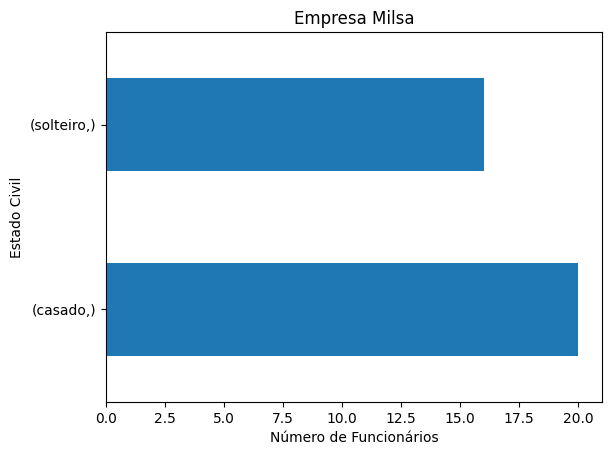

In [10]:
import matplotlib.pyplot as plt
import numpy as np

#Gráfico da quantidade de funcionários por estado civil:
grafico_est_civil = df_milsa.loc(axis = 1)[['Est.civil']].value_counts().plot(kind="barh")
grafico_est_civil.set_title('Empresa Milsa')
grafico_est_civil.set_ylabel('Estado Civil')
grafico_est_civil.set_xlabel('Número de Funcionários')

Grafico de Pizza

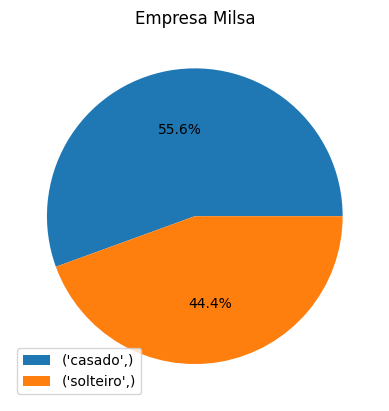

In [11]:
import matplotlib.pyplot as plt
import numpy as np

#x=[20,16]
#labels=['Casado','Solteiro']
x=df_milsa.loc(axis = 1)[['Est.civil']].value_counts()
labels=est_civil.index

fig, ax = plt.subplots()
ax.pie( x,autopct='%1.1f%%')
##ax.pie( x,labels=labels,autopct='%1.1f%%')

ax.set_title('Empresa Milsa')
ax.legend(labels)

In [12]:
moda = df_milsa['Est.civil'].mode()
print(moda)

0    casado
Name: Est.civil, dtype: object


Tabela de frequências para o atributo de grau de instrução (semelhante ao atributo de estado civil)

In [13]:
grau_inst = df_milsa.loc(axis = 1)[['Inst']].value_counts()
grau_inst

percentual = df_milsa.loc(axis = 1)[['Inst']].value_counts(normalize = True)*100

dist_freq_colunas = pd.DataFrame({'Frequencia': grau_inst, 'Porcentagem(%)': percentual})
print(dist_freq_colunas)

latex_code = tabulate(dist_freq_colunas, headers='keys', tablefmt='latex_raw')
print(latex_code)

          Frequencia  Porcentagem(%)
Inst                                
2o Grau           18       50.000000
1o Grau           12       33.333333
Superior           6       16.666667
\begin{tabular}{lrr}
\hline
               &   Frequencia &   Porcentagem(%) \\
\hline
 ('2o Grau',)  &           18 &          50      \\
 ('1o Grau',)  &           12 &          33.3333 \\
 ('Superior',) &            6 &          16.6667 \\
\hline
\end{tabular}


In [15]:
moda = df_milsa['Inst'].mode()
print(moda)

0    2o Grau
Name: Inst, dtype: object


In [16]:
n_filhos = df_milsa.loc(axis = 1)[['Filhos']].value_counts()

percentual = df_milsa.loc(axis = 1)[['Filhos']].value_counts(normalize = True)*100

dist_freq_colunas = pd.DataFrame({'Frequencia': n_filhos, 'Porcentagem(%)': percentual})
# print(dist_freq_colunas)

latex_code = tabulate(dist_freq_colunas, headers='keys', tablefmt='latex_raw')
print(latex_code)

\begin{tabular}{lrr}
\hline
        &   Frequencia &   Porcentagem(%) \\
\hline
 (0.0,) &           20 &         55.5556  \\
 (2.0,) &            7 &         19.4444  \\
 (1.0,) &            5 &         13.8889  \\
 (3.0,) &            3 &          8.33333 \\
 (5.0,) &            1 &          2.77778 \\
\hline
\end{tabular}


In [17]:
media = df_milsa.loc(axis = 1)[['Filhos']].mean()
moda = df_milsa.loc(axis = 1)[['Filhos']].mode()
mediana = df_milsa.loc(axis = 1)[['Filhos']].median()
desv_pad = df_milsa.loc(axis = 1)[['Filhos']].std()
variancia = df_milsa.loc(axis = 1)[['Filhos']].var()
amplitude = df_milsa.loc(axis = 1)[['Filhos']].max() - df_milsa.loc(axis = 1)[['Filhos']].min()
coef_var = desv_pad / media

print("media = ", media)
print("moda = ", moda)
print("mediana = ", mediana)
print("desvio padrao = ", desv_pad)
print("variancia = ", variancia)
print("amplitude = ", amplitude)
print("coeficiente de variância = ", coef_var)

media =  Filhos    0.916667
dtype: float64
moda =     Filhos
0     0.0
mediana =  Filhos    0.0
dtype: float64
desvio padrao =  Filhos    1.250714
dtype: float64
variancia =  Filhos    1.564286
dtype: float64
amplitude =  Filhos    5.0
dtype: float64
coeficiente de variância =  Filhos    1.364415
dtype: float64


Text(0.5, 0, 'Número de Funcionários')

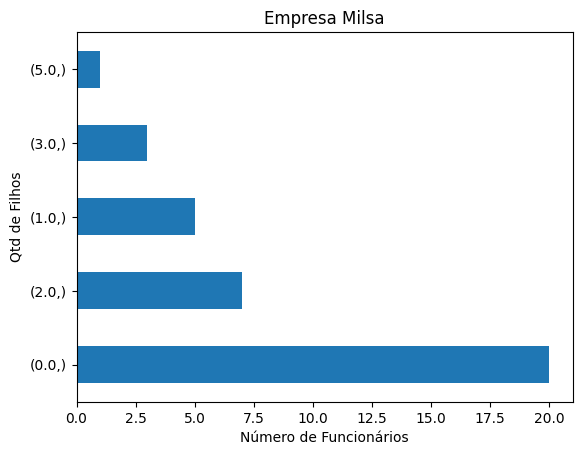

In [18]:
#Gráfico da quantidade de funcionários por estado civil:
grafico_filhos = df_milsa.loc(axis = 1)[['Filhos']].value_counts().plot(kind="barh")
grafico_filhos.set_title('Empresa Milsa')
grafico_filhos.set_ylabel('Qtd de Filhos')
grafico_filhos.set_xlabel('Número de Funcionários')

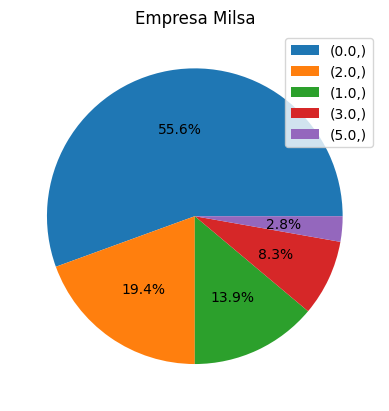

In [19]:
x=df_milsa.loc(axis = 1)[['Filhos']].value_counts()
labels=n_filhos.index

fig, ax = plt.subplots()
ax.pie( x,autopct='%1.1f%%')
##ax.pie( x,labels=labels,autopct='%1.1f%%')

ax.set_title('Empresa Milsa')
ax.legend(labels)

# Variável Quantitativa Contínua

Tabela de distribuição de frequencia

In [20]:
# dados milsa - salário
df_salario=df_milsa['Salario']
df_salario.sort_values(ascending=True)


Funcionario
1      4.00
2      4.56
3      5.25
4      5.73
5      6.26
6      6.66
7      6.86
8      7.39
10     7.44
9      7.59
11     8.12
12     8.46
13     8.74
14     8.95
15     9.13
16     9.35
17     9.77
18     9.80
19    10.53
20    10.76
21    11.06
22    11.59
23    12.00
24    12.79
25    13.23
26    13.60
27    13.85
28    14.69
29    14.71
30    15.99
31    16.22
32    16.61
33    17.26
34    18.75
35    19.40
36    23.30
Name: Salario, dtype: float64

In [21]:
import pandas as pd
import math

menors = df_salario.min()
maiors = df_salario.max()
print("O menor salário é: ", menors)
print("O maior salário é: ", maiors)

# Amplitude dos dados : maior maior dos registros menos menor valor
at = df_salario.max() - df_salario.min()
print('at',at)

# k = raiz quadrada do total de registros/amostras
k = math.sqrt(len(df_salario))
print('k',k)

# O valor de amplitude de classe pode ser arredondado para um número inteiro, geralmente para facilitar a interpretação da tabela.
h = at/k
h = math.ceil(h)
print('h',h)

O menor salário é:  4.0
O maior salário é:  23.3
at 19.3
k 6.0
h 4


In [22]:
#Tabela de Frequencia

# Cria um DataFrame
dfs = pd.DataFrame(df_milsa, columns=['Salario'])

# Definir os intervalos de classe
#informando a variação das classes (bins)- pd.cut(aberto no limite inferior)
dfs['Intervalo de Classe'] = pd.cut(dfs['Salario'], bins=range(0, 28, 4))

# Cria a tabela de distribuição de frequências (contagem)
tabela_freq = dfs['Intervalo de Classe'].value_counts(sort=False)

#print(tabela_freq)

# Organiza os intervalos de classe em ordem crescente
tabela_freq = tabela_freq.sort_index()

# Calcula as frequências relativas
tabela_freq_relativa = tabela_freq / tabela_freq.sum()

# Calcula as frequências acumuladas
tabela_freq_acumulada = tabela_freq.cumsum()

# Combina todas as informações em uma tabela
tabela_final = pd.DataFrame({
    'Frequência': tabela_freq,
    'Frequência Relativa': tabela_freq_relativa,
    'Frequência Acumulada': tabela_freq_acumulada
})

latex_code = tabulate(tabela_final, headers='keys', tablefmt='latex_raw')
print(latex_code)

\begin{tabular}{lrrr}
\hline
 Intervalo de Classe   &   Frequência &   Frequência Relativa &   Frequência Acumulada \\
\hline
 (0, 4]                &            1 &             0.0277778 &                      1 \\
 (4, 8]                &            9 &             0.25      &                     10 \\
 (8, 12]               &           13 &             0.361111  &                     23 \\
 (12, 16]              &            7 &             0.194444  &                     30 \\
 (16, 20]              &            5 &             0.138889  &                     35 \\
 (20, 24]              &            1 &             0.0277778 &                     36 \\
\hline
\end{tabular}


Para calcular a moda de dados agrupados, consideramos 
M = l(i) + ('f(i) / ('f(i)) + f'(i)) * h
Neste caso, de acordo com a tabela de frequências temos que a classe com maior frequência é (8, 12]. Logo:
- l(i) = 8
- 'f(i) = 9
- f'(i) = 7
- h = 4

Com estes valores, temos que M = 10.25.

In [23]:
# calculo da moda salarial (dados agrupados)

max_index_interval = tabela_final['Frequência'].idxmax()
max_position = tabela_final.index.get_loc(max_index_interval)
prev_position = max_position - 1
next_position = max_position + 1
li = max_index_interval.left
lfi = tabela_final.iloc[prev_position]['Frequência']
fli = tabela_final.iloc[next_position]['Frequência']
h = max_index_interval.length
moda_salario = li + (lfi/(lfi + fli)) * h
print("moda = ", moda_salario)


media_salario = df_salario.mean()
mediana_salario = df_salario.median()
variancia_salario = df_salario.var()
desvpad_salario = df_salario.std()
coefvar_salario = desvpad_salario / media_salario
print("mediana = ", mediana_salario)
print("variancia = ", variancia_salario)
print("coeficiente de variação = ", coefvar_salario)
df_salario.describe()

moda =  10.25
mediana =  10.165
variancia =  21.044766349206352
coeficiente de variação =  0.4124587166257218


count    36.000000
mean     11.122222
std       4.587458
min       4.000000
25%       7.552500
50%      10.165000
75%      14.060000
max      23.300000
Name: Salario, dtype: float64

In [24]:
# calculo dos coeficientes de assimetria
# 1o coeficiente de pearson
p_coef_pearson = (media_salario - moda_salario) / desvpad_salario
print("1º coeficiente de Pearson = ", p_coef_pearson)
if(p_coef_pearson == 0):
    print("Distribuição simétrica")
elif(p_coef_pearson > 0):
    print("Distribuição assimétrica positiva")
else:
    print("Distribuição assimétrica negativa")


# 2o coeficiente de pearson
q1 = df_salario.quantile(0.25)
q2 = df_salario.quantile(0.50)
q3 = df_salario.quantile(0.75)
s_coef_pearson = (q3 + q1 - 2 *mediana_salario) / (q3 - q1)
print("2º coeficiente de Pearson = ", s_coef_pearson)
if(s_coef_pearson == 0):
    print("Distribuição simétrica")
elif(s_coef_pearson > 0):
    print("Distribuição assimétrica positiva")
else:
    print("Distribuição assimétrica negativa")

1º coeficiente de Pearson =  0.1901319459633111
Distribuição assimétrica positiva
2º coeficiente de Pearson =  0.1970802919708028
Distribuição assimétrica positiva


In [25]:
# coeficiente de curtose / achatamento
p90 = df_salario.quantile(0.9)
p10 = df_salario.quantile(0.1)
curtose = (q3 - q1) / (2*(p90 - p10))
# print(df_salario.kurt())
print("Coeficiente de Curtose = ", curtose)
if(curtose == 0.263):
    print("A curva é mesocúrtica")
elif(curtose < 0.263):
    print("A curva é letocúrtica")
else:
    print("A curva é platicúrtica")

Coefriciente de Curtose =  0.2974177330895794
A curva é platicúrtica


Histograma e Box-plot

Construindo histograma com Matplotlib

Text(0.5, 1.0, 'Histograma da variável salário')

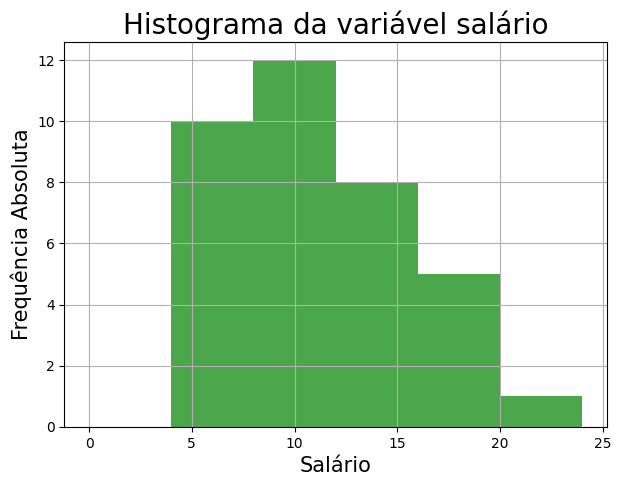

In [26]:
df_milsa['Salario'].hist(bins=range(0, 28, 4), figsize = (7,5), color='green',alpha=0.7)
plt.xlabel('Salário', fontsize=15)
plt.ylabel('Frequência Absoluta', fontsize=15)
plt.title('Histograma da variável salário', fontsize=20)



<Axes: title={'center': 'Boxplot da variável salário'}>

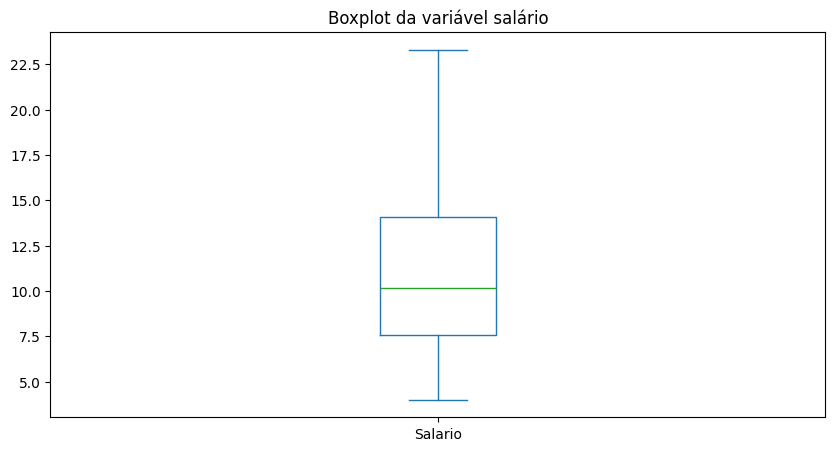

In [27]:
#blox-plot do salario
plt.figure(figsize = (10, 5))
df_milsa['Salario'].plot(kind='box', title='Boxplot da variável salário')

## Variável Idade (anos)

Primeiro gerando a tabela de frequência sem agrupar os dados

In [28]:
idade = df_milsa['Anos'].value_counts().sort_values()
idade

percentual = df_milsa['Anos'].value_counts(normalize = True)*100

dist_freq_colunas = pd.DataFrame({'Frequencia': idade, 'Porcentagem(%)': percentual})
print(dist_freq_colunas)

latex_code = tabulate(dist_freq_colunas, headers='keys', tablefmt='latex_raw')
print(latex_code)

      Frequencia  Porcentagem(%)
Anos                            
20             1        2.777778
23             1        2.777778
25             1        2.777778
26             2        5.555556
27             1        2.777778
28             1        2.777778
29             1        2.777778
30             2        5.555556
31             2        5.555556
32             2        5.555556
33             2        5.555556
34             2        5.555556
35             2        5.555556
36             2        5.555556
37             2        5.555556
38             1        2.777778
39             1        2.777778
40             2        5.555556
41             2        5.555556
42             1        2.777778
43             2        5.555556
44             1        2.777778
46             1        2.777778
48             1        2.777778
\begin{tabular}{rrr}
\hline
   Anos &   Frequencia &   Porcentagem(%) \\
\hline
     20 &            1 &          2.77778 \\
     23 &        

Agora com agrupamento de dados

In [29]:
#Tabela de Frequencia

# Cria um DataFrame
dfs = pd.DataFrame(df_milsa, columns=['Anos'])

limite_superior = dfs['Anos'].max() + 4
limite_inferior = dfs['Anos'].min() - 4

# Definir os intervalos de classe
#informando a variação das classes (bins)- pd.cut(aberto no limite inferior)
dfs['Intervalo de Classe'] = pd.cut(dfs['Anos'], bins=range(limite_inferior, limite_superior, 4))

# Cria a tabela de distribuição de frequências (contagem)
tabela_freq = dfs['Intervalo de Classe'].value_counts(sort=False)

#print(tabela_freq)

# Organiza os intervalos de classe em ordem crescente
tabela_freq = tabela_freq.sort_index()

# Calcula as frequências relativas
tabela_freq_relativa = tabela_freq / tabela_freq.sum()

# Calcula as frequências acumuladas
tabela_freq_acumulada = tabela_freq.cumsum()

# Combina todas as informações em uma tabela
tabela_final = pd.DataFrame({
    'Frequência': tabela_freq,
    'Frequência Relativa': tabela_freq_relativa,
    'Frequência Acumulada': tabela_freq_acumulada
})

latex_code = tabulate(tabela_final, headers='keys', tablefmt='latex_raw')
print(latex_code)


\begin{tabular}{lrrr}
\hline
 Intervalo de Classe   &   Frequência &   Frequência Relativa &   Frequência Acumulada \\
\hline
 (16, 20]              &            1 &             0.0277778 &                      1 \\
 (20, 24]              &            1 &             0.0277778 &                      2 \\
 (24, 28]              &            5 &             0.138889  &                      7 \\
 (28, 32]              &            7 &             0.194444  &                     14 \\
 (32, 36]              &            8 &             0.222222  &                     22 \\
 (36, 40]              &            6 &             0.166667  &                     28 \\
 (40, 44]              &            6 &             0.166667  &                     34 \\
 (44, 48]              &            2 &             0.0555556 &                     36 \\
\hline
\end{tabular}


Medidas de tendência central

In [30]:
# calculo da moda de idade (dados agrupados)

max_index_interval = tabela_final['Frequência'].idxmax()
max_position = tabela_final.index.get_loc(max_index_interval)
prev_position = max_position - 1
next_position = max_position + 1
li = max_index_interval.left
lfi = tabela_final.iloc[prev_position]['Frequência']
fli = tabela_final.iloc[next_position]['Frequência']
h = max_index_interval.length
moda_idade = li + (lfi/(lfi + fli)) * h
print("moda = ", moda_salario)

df_idade=df_milsa['Anos']
df_idade.sort_values(ascending=True)

media_idade = df_idade.mean()
mediana_idade = df_idade.median()
variancia_idade = df_idade.var()
desvpad_idade = df_idade.std()
coefvar_idade = desvpad_idade / media_idade
print("mediana = ", mediana_idade)
print("variancia = ", variancia_idade)
print("coeficiente de variação = ", coefvar_idade)
print("media = ", media_idade)
df_idade.describe()

moda =  10.25
mediana =  34.5
variancia =  45.392857142857146
coeficiente de variação =  0.1948170258428677
media =  34.583333333333336


count    36.000000
mean     34.583333
std       6.737422
min      20.000000
25%      30.000000
50%      34.500000
75%      40.000000
max      48.000000
Name: Anos, dtype: float64

Coeficiente de assimetria e curtose

In [31]:
# calculo dos coeficientes de assimetria
# 1o coeficiente de pearson
p_coef_pearson = (media_idade - moda_idade) / desvpad_idade
print("1º coeficiente de Pearson = ", p_coef_pearson)
if(p_coef_pearson == 0):
    print("Distribuição simétrica")
elif(p_coef_pearson > 0):
    print("Distribuição assimétrica positiva")
else:
    print("Distribuição assimétrica negativa")


# 2o coeficiente de pearson
q1 = df_idade.quantile(0.25)
q2 = df_idade.quantile(0.50)
q3 = df_idade.quantile(0.75)
s_coef_pearson = (q3 + q1 - 2 *mediana_idade) / (q3 - q1)
print("2º coeficiente de Pearson = ", s_coef_pearson)
if(s_coef_pearson == 0):
    print("Distribuição simétrica")
elif(s_coef_pearson > 0):
    print("Distribuição assimétrica positiva")
else:
    print("Distribuição assimétrica negativa")

1º coeficiente de Pearson =  0.06374651466462038
Distribuição assimétrica positiva
2º coeficiente de Pearson =  0.1
Distribuição assimétrica positiva


In [33]:
# coeficiente de curtose / achatamento
p90 = df_idade.quantile(0.9)
p10 = df_idade.quantile(0.1)
curtose = (q3 - q1) / (2*(p90 - p10))
# print(df_salario.kurt())
print("Coeficiente de Curtose = ", curtose)
if(curtose == 0.263):
    print("A curva é mesocúrtica")
elif(curtose < 0.263):
    print("A curva é letocúrtica")
else:
    print("A curva é platicúrtica")

Coeficiente de Curtose =  0.29411764705882354
A curva é platicúrtica


Histograma e Box-Plot


Text(0.5, 1.0, 'Histograma da variável idade (anos)')

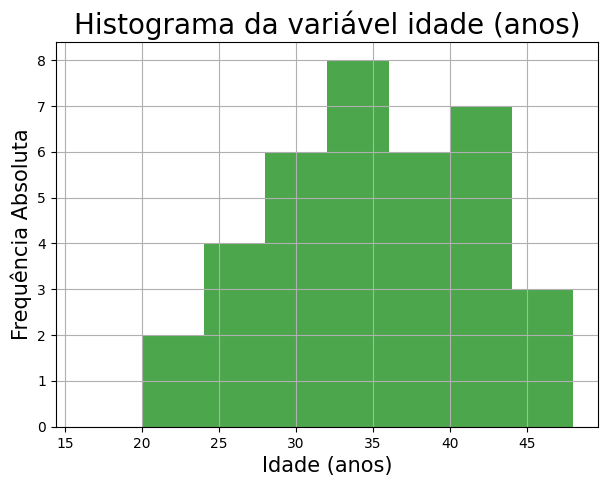

In [35]:
inferior = df_milsa['Anos'].min() - 4
superior = df_milsa['Anos'].max() + 4
df_milsa['Anos'].hist(bins=range(inferior, superior, 4), figsize = (7,5), color='green',alpha=0.7)
plt.xlabel('Idade (anos)', fontsize=15)
plt.ylabel('Frequência Absoluta', fontsize=15)
plt.title('Histograma da variável idade (anos)', fontsize=20)



<Axes: title={'center': 'Boxplot da variável idade (anos)'}>

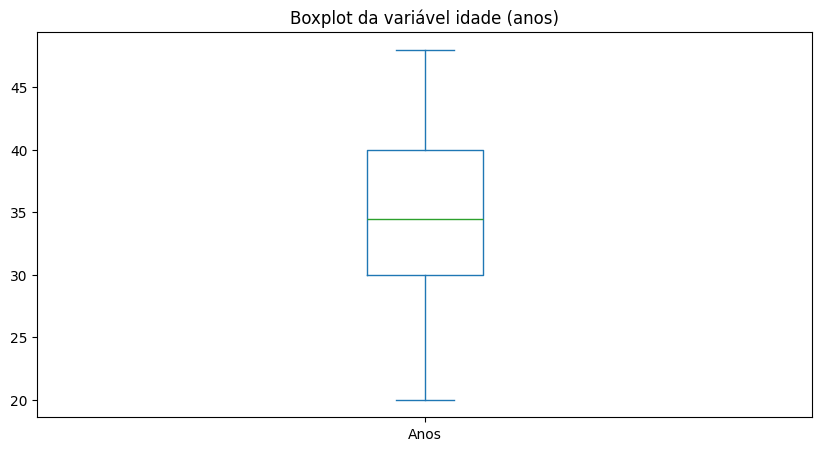

In [36]:
#blox-plot da idade
plt.figure(figsize = (10, 5))
df_milsa['Anos'].plot(kind='box', title='Boxplot da variável idade (anos)')

## Variável Região
Tabela de Frequências

In [40]:
#Quantidade de funcionários por regiao (frequencia absoluta):
regiao = df_milsa.loc(axis = 1)[['Regiao']].value_counts()

regiao_relativa = df_milsa.loc(axis = 1)[['Regiao']].value_counts(normalize=True)
dist_freq_relat = pd.DataFrame({'Frequencia': regiao})
print(dist_freq_relat)

# Gerar código LaTeX
latex_code = tabulate(dist_freq_relat, headers='keys', tablefmt='latex_raw')

print(latex_code)

percentual = df_milsa.loc(axis = 1)[['Regiao']].value_counts(normalize = True)*100

dist_freq_colunas = pd.DataFrame({'Frequencia': regiao, 'Porcentagem(%)': percentual})
print(dist_freq_colunas)

latex_code = tabulate(dist_freq_colunas, headers='keys', tablefmt='latex_raw')
print(latex_code)

          Frequencia
Regiao              
outro             13
interior          12
capital           11
\begin{tabular}{lr}
\hline
               &   Frequencia \\
\hline
 ('outro',)    &           13 \\
 ('interior',) &           12 \\
 ('capital',)  &           11 \\
\hline
\end{tabular}
          Frequencia  Porcentagem(%)
Regiao                              
outro             13       36.111111
interior          12       33.333333
capital           11       30.555556
\begin{tabular}{lrr}
\hline
               &   Frequencia &   Porcentagem(%) \\
\hline
 ('outro',)    &           13 &          36.1111 \\
 ('interior',) &           12 &          33.3333 \\
 ('capital',)  &           11 &          30.5556 \\
\hline
\end{tabular}


Gráfico de barras


Text(0.5, 0, 'Número de Funcionários')

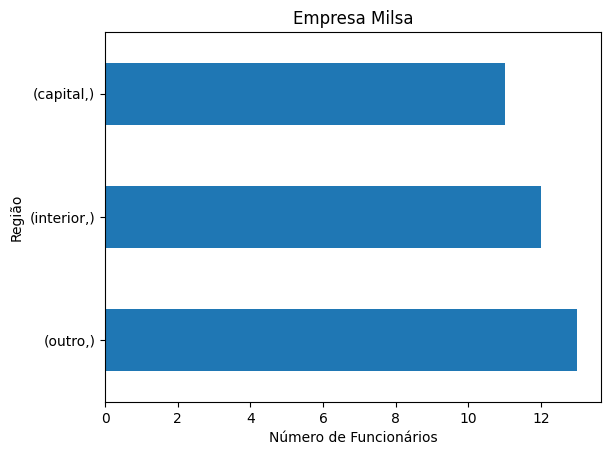

In [41]:
#Gráfico da quantidade de funcionários por regiao:
grafico_est_civil = df_milsa.loc(axis = 1)[['Regiao']].value_counts().plot(kind="barh")
grafico_est_civil.set_title('Empresa Milsa')
grafico_est_civil.set_ylabel('Região')
grafico_est_civil.set_xlabel('Número de Funcionários')

Moda de região

In [42]:
moda_regiao = df_milsa['Regiao'].mode()
print(moda_regiao)

0    outro
Name: Regiao, dtype: object


### Questões (análise univariada)
- Quantos funcionários tem curso superior?

In [47]:
contagem_inst = df_milsa['Inst'].value_counts()
qtd_sup = contagem_inst.get('Superior', 0)
print(qtd_sup)

6


- O que se pode afirmar sobre a região de procedência? (A maioria vem do interior? Ou da Capital? Ou outros?)

In [48]:
moda_regiao = df_milsa['Regiao'].mode()
print(moda_regiao)

0    outro
Name: Regiao, dtype: object


- Quantos funcionários possuem salário superior a 8 salários mínimos?

In [51]:
count_sal_min = (df_milsa['Salario'] > 8).sum()
print(count_sal_min)

26


- Mais do que 60% dos funcionários estão em que faixa etária? 

Construindo histograma com Seaborn

In [42]:
pip install matplotlib seaborn


Note: you may need to restart the kernel to use updated packages.


In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

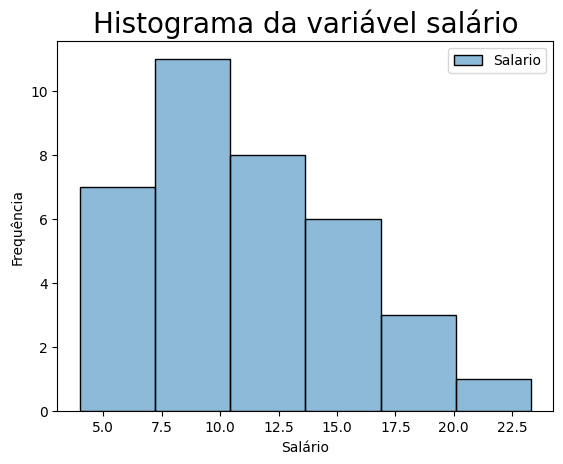

In [44]:
#dados
# Cria um DataFrame
dfs = pd.DataFrame(df_milsa, columns=['Salario'])

# Criando o histograma com Seaborn
sns.histplot(dfs, bins=6, kde=False, color='green')
plt.title('Histograma da variável salário', fontsize=20)
plt.xlabel('Salário')
plt.ylabel('Frequência')

# Exibindo o gráfico
plt.show()

# Medidas descritivas

In [ ]:
#carregar bibliotecas
import numpy as np # linear algebra
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Estatistica dos dados

df_milsa.describe()

,Filhos,Salario,Anos,Meses
count,36.000000,36.000000,36.000000,36.000000
mean,0.916667,11.122222,34.583333,5.611111
std,1.250714,4.587458,6.737422,3.288749
min,0.000000,4.000000,20.000000,0.000000
25%,0.000000,7.552500,30.000000,3.750000
50%,0.000000,10.165000,34.500000,6.000000
75%,2.000000,14.060000,40.000000,8.000000
max,5.000000,23.300000,48.000000,11.000000


In [ ]:
#informações quanto aos dados
df_milsa.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36 entries, 1 to 36
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Est.civil  36 non-null     object 
 1   Inst       36 non-null     object 
 2   Filhos     36 non-null     float64
 3   Salario    36 non-null     float64
 4   Anos       36 non-null     int64  
 5   Meses      36 non-null     int64  
 6   Regiao     36 non-null     object 
dtypes: float64(2), int64(2), object(3)
memory usage: 2.2+ KB


In [ ]:
import pandas as pd

#Calculo da média
mediasalario= df_milsa['Salario'].mean ()
print(mediasalario)

#Calculo da mediana
medianasalario= df_milsa['Salario'].median ()
print(medianasalario)

#calculo do desvio-padrao
desviosal=df_milsa['Salario'].std()
print(desviosal)


11.122222222222222
10.165
4.5874575038038605


<Axes: >

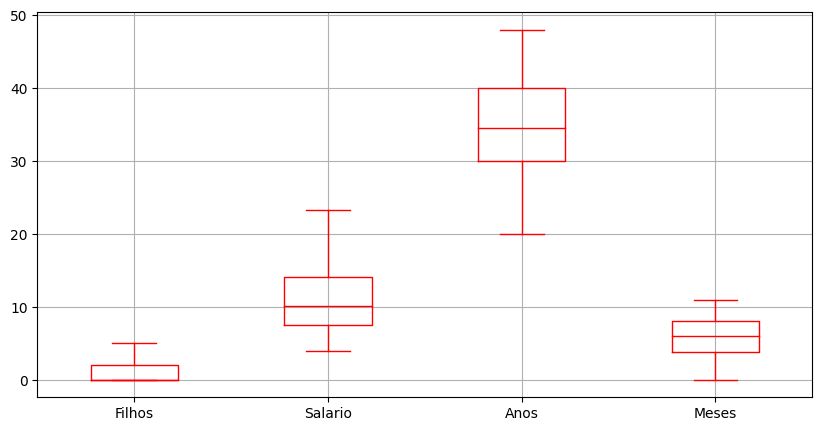

In [ ]:
#blox-plot
plt.figure(figsize = (10, 5))
df_milsa.boxplot(color='red')
